
<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Sistemi linearnih algebrajskih enačb (1)</b></font>
<br><br>
<font size="4">
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Julij 2017</font>
</center>

# Table of Contents
 <p><div class="lev1"><a href="#Uvod"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev2"><a href="#Enoličnost-rešitve"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Enoličnost rešitve</a></div><div class="lev2"><a href="#Slaba-pogojenost-matrik"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Slaba pogojenost matrik</a></div><div class="lev3"><a href="#Poglejmo,-kaj-se-dogaja-v-naših-preprostih-primerih:"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Poglejmo, kaj se dogaja v naših preprostih primerih:</a></div><div class="lev2"><a href="#Pristopi-k-numeričnemu-reševanju"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pristopi k numeričnemu reševanju</a></div><div class="lev3"><a href="#Pregled-direktnih-metod"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Pregled direktnih metod</a></div><div class="lev1"><a href="#Gaussova-eliminacija"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gaussova eliminacija</a></div><div class="lev2"><a href="#Numerična-zahtevnost"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerična zahtevnost</a></div><div class="lev2"><a href="#Povzetek-Gaussove-eliminacije"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Povzetek Gaussove eliminacije</a></div><div class="lev1"><a href="#Nekaj-vprašanj-za-razmislek!"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1"><a href="#Dodatno"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dodatno</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing()

# Uvod

Pod zgornjim naslovom razumemo reševanje enačbe:

$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$

kjer sta $\mathbf{A}$ in $\mathbf{b}$ znana matrika in vektor, vektor $\mathbf{x}$ pa ni znan. Matriko $\mathbf{A}$ imenujemo **matrika koeficientov**, vektor $\mathbf{b}$ **vektor konstant** in $\mathbf{x}$ **vektor neznank**. Če matriki $\mathbf{A}$ dodamo kot stolpec vektor $\mathbf{b}$, dobimo t. i. **razširjeno matriko** in jo označimo $[\mathbf{A}|\mathbf{b}]$.

Opomba glede oblike:
* skalarne spremenljivke pišemo poševno, npr.: $a$,
* vektorske spremenljivke pišemo z majhno črko poudarjeno, npr.: $\mathbf{a}$,
* matrične  spremenljivke pišemo z veliko črko poudarjeno, npr.: $\mathbf{A}$.

Preprost **simbolni** primer je:

In [2]:
A11, A12, A21, A22 = sym.symbols('A11, A12, A21, A22')
x1, x2 = sym.symbols('x1, x2')
b1, b2 = sym.symbols('b1, b2')
A = sym.Matrix([[A11, A12],
                [A21, A22]])
x = sym.Matrix([[x1],
                [x2]])
b = sym.Matrix([[b1],
                [b2]])

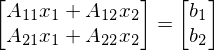

In [3]:
eq = sym.Eq(A*x,b)
eq

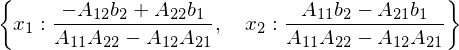

In [4]:
#%%timeit
resitev = sym.solve(eq,[x1, x2])
resitev

## Enoličnost rešitve

Rešitve sistema linearnih enačb ne spremenimo:
* z množenjem poljubne enačbe s konstanto (ki je različna od nič),
* s spreminjanjem vrstnega reda enačb,
* s prištevanjem ene enačbe (pomnožene s konstanto) drugi enačbi.

Z zgornjimi operacijami lahko za vsako matriko enolično določimo t. i. **vrstično kanonično obliko matrike**, ki definira rang matrike.

Če je rang matrike $\mathbf(A)$ in rang razširjene matrike $[\mathbf{A}|\mathbf{b}]$ enak, potem rešitev **obstaja**:
* $r=n$: natanko ena rešitev,
* $r<n$: neskončno mnogo rešitev.

Opomba: $r$ rang matrike $\mathbf(A)$ oz. $[\mathbf{A}|\mathbf{b}]$, $n$ število neznank.

Osredotočili se bomo na sistem $n$ linearnih enačbami z $n$ neznankami:
$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$
takšen sistem ima rešitev
$$\mathbf{x}=\mathbf{A^{-1}}\,\mathbf{b},$$
če determinanta **matrike koeficientov** ni singularna; to pomeni, da $|\mathbf{A}|\neq 0$. V tem primeru so vrstice in stolpci linearno neodvisni; z drugimi besedami nobena vrstica ali stolpec ni linearna kombinacija ostalih vrstc ali stolpcev (priporočam vizualno razlago determinante: [The determinant | Essence of linear algebra](https://www.youtube.com/watch?v=Ip3X9LOh2dk&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)).

Pozneje se bomo tudi dotaknili reševanja $m$ linearnih enačb z $n$ neznankami, ko bo $m>n$. Imamo torej predoločeni sistem, ki ga rešimo s t. i. **psevdoinverzom**:
$$\mathbf{A}\,\mathbf{x}=\mathbf{b}$$
takšen sistem ima rešitev
$$\mathbf{x}=\mathbf{A^{+}}\,\mathbf{b}.$$

Vrnimo se sedaj na sistem $n$ enačb z $n$ neznankami! Determinanta je:

In [5]:
A.det()

Če je matrika koeficientov singularna $|\mathbf{A}|=0$, potem ima sistem linearnih enačb neskončno mnogo rešitev ali pa rešitve sploh nima (odvisno od vektorja konstant $\mathbf{b}$).

Poglejmo si primer sistema, ko so **enačbe linearno odvisne**:

In [6]:
par1 = {A11: 1, A21: 2, A12: 2, A22: 4, b1: 1, b2: 2}

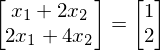

In [7]:
lin_odv = eq.subs(par1)
lin_odv

Ker drugo enačbo dobimo iz prve (z množenjem z 2), ima takšen sistem neskončno rešitev:

In [8]:
sym.solve(lin_odv,[x1, x2])

Preverimo še determinanto:

In [9]:
A.subs(par1).det()

Poglejmo še primer, ko **rešitve sploh ni**:

In [10]:
par2 = {A11: 1, A21: 2, A12: 2, A22: 4, b1: 1, b2: 1}

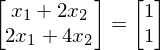

In [11]:
ni_res = eq.subs(par2)
ni_res

In [12]:
sym.solve(ni_res,[x1, x2])

Vidmo, da je rešitev ene enačbe v nasprotju z drugo. Preverimo še determinanto:

In [13]:
A.subs(par2).det()

## Slaba pogojenost matrik

Za enolično rešitev torej želimo nesingularno determinanto matrike koeficientov! Kaj pa se dogaja z rešitvijo, kadar je determinanta $|\mathbf{A}|$ **zelo majhna (relativno blizu nič)**?

Ker gre za relativno oceno, potrebujemo referenco, ki jo tipično poimenujemo **norma** matrike in označimo z $||\textbf{A}||$. 

Za determinanto matrike $\textbf{A}$ rečemo, da je majhna, kadar velja:
$$|\textbf{A}|\ll||\textbf{A}||.$$

Obstaja več načinov merjenja norme, poglejmo si tukaj dve:
* Evklidska norma (tudi Frobeniusova):
$$||\textbf{A}||_e=\sqrt{\sum_{i=1}^n\sum_{j=1}^nA_{ij}^2}$$
* Norma vsote vrstic ali tudi neskončna norma:
$$||\textbf{A}||_{\infty}=\max_{1\le i\le n}\sum_{j=1}^n |A_{ij}|$$

Obstaja pa tudi formalno merilo pogojenosti:
$$\textrm{cond}(||\textbf{A}||)=||\textbf{A}||\,||\textbf{A}^{-1}||.$$

**Če je merilo pogojenosti blizu vrednosti 1, potem govorimo, da je matrika dobro pogojena** in obratno pri slabi pogojenosti se zelo poveča (v primeru singularne matrike proti neskončnosti).

### Poglejmo, kaj se dogaja v naših preprostih primerih:

Najprej slabo pogojen sistem:

In [14]:
par3 = {A11: 1, A21: 1, A12: 1, A22: 1.001, b1: 3, b2: 0.}

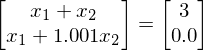

In [15]:
eq.subs(par3)

In [16]:
sym.solve(eq.subs(par3), [x1, x2])

Majhna sprememba matrike koeficientov bo povzročila veliko spremembo rezultata:

In [17]:
par3[A22] = 1.001*par3[A22]
par3

In [18]:
sym.solve(eq.subs(par3), [x1, x2])

In [19]:
np.linalg.cond(np.array(A.subs(par3).tolist(), dtype=float))

Sedaj pa dobro pogojen sistem:

In [20]:
par4 = {A11: 1, A21: 1, A12: 2, A22: 6., b1: 1, b2: 8}

In [21]:
np.linalg.cond(np.array(A.subs(par4).tolist(), dtype=float))

In [22]:
sym.solve(eq.subs(par4))

In [23]:
par4[A22] = 1.001*par4[A22]
sym.solve(eq.subs(par4))

Žal je izračun pogojenosti matrike numerično relativno zahteven (v primeru velih matrik, je inverz zelo zamuden) in zato pogosto *determinanto matrike* primerjamo z *normo* matrike.

## Pristopi k numeričnemu reševanju

Dva v principu različna pristopa k reševanju sistemov linearnih algebrajskih enačb:

A) **Direktni pristop**: nad sistemom enačb izvajamo elementarne operacije, ki ne spreminjajo rešitve, lahko pa spreminjajo vrednost determinante $|\mathbf{A}|$:
   * zamenjava vrstic (spremeni predznak $|\mathbf{A}|$)
   * množenje vrstice z nenično konstanto (vrednost determinante  $|\mathbf{A}|$ se pomnoži z isto vrednostjo)
   * odštevanje vrstic (ne spremeni $|\mathbf{A}|$).


B) **Iterativni pristop**: začne iskanje na podlagi začetnega približka, nato pa rešitev iterativno izboljšuje. Iterativne metode so načeloma manj natančne, vendar numerično bolj učinkovite pri velikih in/ali redkih (sparse) matrikah.    

### Pregled direktnih metod

Nekatere najpogosteje uporabljene direktne metode so naštete spodaj. Vse začnejo iz začetnega problema $\mathbf{A}\,\mathbf{x}=\mathbf{b}$, ki ga z elementarnimi operacijami poskušajo preoblikovati v enostavno rešljivo obliko.

|             Metoda          | Končna oblika|
|:---------------------------:|:--------:|
|||
|**Gaussova eliminacija** | $\mathbf{U}\,\mathbf{x}=\mathbf{c}$ |
|**LU razcep (dekompozicija)** | $\mathbf{L}\,\mathbf{U}\,\mathbf{x}=\mathbf{b}$|
|**Gauss-Jordan eliminacija** | $\mathbf{I}\,\mathbf{x}=\mathbf{c}$ |

V zgornji tabeli $\mathbf{U}$ predstavlja zgornjo (*upper*) trikotno matriko, $\mathbf{L}$ predstavlja spodnjo (*lower*) trikotno matriko in $\mathbf{I}$ predstavlja enotsko matriko. Matriko imenujemo **trikotna**, če ima na eni strani diagonale samo ničelne člene; kot bomo videli pozneje, nam taka matrika bistveno poenostavi izračune.

V nadaljevanju si bomo pogledali primer reševanja sistema enačb:

In [24]:
A = np.array([[8, -6, 3],
              [-6, 6, -6],
              [3, -6, 6]], dtype=float) # poskusite tukaj izpustiti dtype=float
                                        # ter preverite rešitev pri Gaussovi elim.
b = np.array([-14, 36, 6])

Ponovimo **simbolno** reševanje:

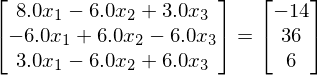

In [25]:
x1, x2, x3 = sym.symbols('x1, x2, x3')
b1, b2, b3 = sym.symbols('b1, b2, b3')
As = sym.Matrix(A)
xs = sym.Matrix([[x1],
             [x2],
             [x3]])
bs = sym.Matrix(np.transpose([b]))
eq = sym.Eq(As * xs, bs)
eq

In [26]:
sym.solve(eq, x1, x2, x3)

Sedaj rešimo še numerično, najprej preverimo determinanto, rang in pogojenost:

In [27]:
Ab = np.column_stack((A,b))
[np.linalg.det(A), np.linalg.matrix_rank(A), np.linalg.matrix_rank(Ab), np.linalg.cond(A)]

[-53.999999999999986, 3, 3, 20.992161172793562]

Preverimo najprej rešitev z vgrajeno ``numpy`` funkcijo:

In [28]:
#%timeit 
x = np.linalg.solve(A,b)
x

array([-14.        , -24.66666667, -16.66666667])

In [29]:
np.dot(A, x)

array([-14.,  36.,   6.])

# Gaussova eliminacija

Najprej pripravimo razširjeno matriko koeficientov:
$$\begin{bmatrix}
\mathbf{A}|\mathbf{b}
\end{bmatrix}=
\left[\begin{array}{cccc|c}
A_{11}&A_{12}&\cdots & A_{1n} & b_1\\
A_{21}&A_{22}&\cdots & A_{2n} & b_2\\
\vdots&\vdots&\ddots & \vdots & \vdots\\
A_{n1}&A_{n2}&\cdots & A_{nn} & b_n\\
\end{array}\right]
$$

In [30]:
Ab = np.column_stack((A,b))
Ab

array([[  8.,  -6.,   3., -14.],
       [ -6.,   6.,  -6.,  36.],
       [  3.,  -6.,   6.,   6.]])

In [31]:
(v, s) = Ab.shape
# eliminacija
for p, pivot_vrsta in enumerate(Ab[:-1]):
    for vrsta in Ab[p+1:]:
        if pivot_vrsta[p]:
            vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*vrsta[p]/pivot_vrsta[p]
    print('Korak: {:g}'.format(p))
    print(Ab)

Korak: 0
[[  8.     -6.      3.    -14.   ]
 [  0.      1.5    -3.75   25.5  ]
 [  0.     -3.75    4.875  11.25 ]]
Korak: 1
[[  8.    -6.     3.   -14.  ]
 [  0.     1.5   -3.75  25.5 ]
 [  0.     0.    -4.5   75.  ]]


Preostane samo še iskanje rešitve (začnemo spodaj):

In [32]:
x = np.zeros(v) # pripravimo prazni seznam

Najprej poglejmo samo določeno vrstico $i$ in delimo $b_i$ z $Ab_{ii}$:

In [33]:
# delno pravilno, da lažje sledimo
for p, pivot_vrsta in enumerate(Ab[::-1]):
    x[v-p-1] = (pivot_vrsta[-1]) / (pivot_vrsta[v-p-1])

In [34]:
x

array([ -1.75      ,  17.        , -16.66666667])

Do določitve $x$ manjka še odštevanje:

In [35]:
for p, pivot_vrsta in enumerate(Ab[::-1]):
    x[v-p-1] = (pivot_vrsta[-1] - np.dot(pivot_vrsta[v-p:-1], x[v-p:]) ) / (pivot_vrsta[v-p-1])

In [36]:
x   

array([-14.        , -24.66666667, -16.66666667])

Opomba: zgornji algoritem imenujemo **obratno vstavljanje** (angl. *back substitution*), saj rešujemo sistem $\mathbf{U}\,\mathbf{x}=\mathbf{b}$, kjer je $\mathbf{U}$ zgornja trikotna matrika.

V kolikor bi reševali sistem $\mathbf{L}\,\mathbf{x}=\mathbf{b}$ in je $\mathbf{L}$ spodnja trikotna matrika, bi to imenovali **direktno vstavljanje** (angl. *forward substitution*).


## Numerična zahtevnost

Numerično zahtevnost ocenjujemo po številu matematičnih operacij, ki so potrebne za izračun. 
Za rešitev $n$ linearnih enačb tako z Gaussovo eliminacijo potrebujemo približno $n^3/3$ matematičnih operacij. Za določitev neznank $\mathbf{x}$ potrebujemo še dodatnih približno $n^2$ operacij.

Pri Gaussovi eliminaciji smo eliminacijo izvedli samo za člene pod diagonalo; če bi z eliminacijo nadaljevali in jo izvedli tudi za člene nad diagonalo, bi izvedli t. i. *Gauss-Jordanovo* eliminacijo, za katero pa potrebujemo približno $n^3/3$ operacij* (kar se šteje kot glavna slabost te metode).

\* Nekaj komentarjev na temo števila numeričnih operacij najdete tukaj: [pinm.ladisk.si](http://pinm.ladisk.si/303/kako-dolo%C4%8Damo-numeri%C4%8Dno-zahtevnost-algoritmov).

## Povzetek Gaussove eliminacije

V ``orodja.py`` shranimo funkcije:

In [37]:
def gaussova_eliminacija(A, b, prikazi_korake = False):
    Ab = np.column_stack(A, b)
    for p, pivot_vrsta in enumerate(Ab[:-1]):
        for vrsta in Ab[p+1:]:
            if pivot_vrsta[p]:
                vrsta[p:] = vrsta[p:]-pivot_vrsta[p:]*vrsta[p]/pivot_vrsta[p]
        if prikazi_korake:
            print('Korak: {:g}'.format(p))
            print(Ab)
    return Ab
def gaussova_el_resitev(Ab):
    v = len(Ab)
    x = zeros(v)
    for p, pivot_vrsta in enumerate(Ab[::-1]):
        x[v-p-1] = (pivot_vrsta[-1] - dot(pivot_vrsta[v-p:-1], x[v-p:]) ) / (pivot_vrsta[v-p-1])
    return v

# Nekaj vprašanj za razmislek!

1. Sistem enačb: 
    $$
    \mathbf{A}=
    \begin{bmatrix}
    1 & -4 & 1\\
    1 & 6 & -1\\
    2 & -1 & 2
    \end{bmatrix}
    \qquad
    \mathbf{b}=
    \begin{bmatrix}
    7\\
    13\\
    5
    \end{bmatrix}
    $$

    najdite rešitev s pomočjo ``SymPy``.

* Za zgoraj definirano matriko $\mathbf{A}$ določite Evklidsko normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite neskončno normo (lastni program).
* Za zgoraj definirano matriko $\mathbf{A}$ določite pogojenost (``numpy`` funkcija).
* Definirajte funkcijo ``gauss_elim``, ki za poljubno matriko $\mathbf{A}$ in vektor $\mathbf{b}$ izvede Gaussovo eliminacijo (posebej za matriko in posebej za vektor).
* Definirajte funkcijo ``gauss_elim_x``, ki za razultat funkcije ``gaus_elim`` najde ustrezne vrednosti vektorja $\textbf{x}$.
* Zgornji funkciji dopolnite s štetjem matematičnih operacij.
* Na sliki je prikazan sistem mas:

    <img width=600 src="./fig/mase_na_klancu.png">
    
    Predpostavite, da se sistem zaradi teže giblje po klancu navzdol z neznanim pospeškom $a$ in da so vrvi napete z neznanimi silami $F_i$. Znane veličine so (sami jih določite): posamično telo ima maso $m_i$, koeficient trenja s podlago $\mu_i=1$, $g=9,81$m/s$^2$, $\varphi=55^{\circ}$.
    Določite sistem enačb v primeru dveh teles. Določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{b}$ ter $\mathbf{x}$.
* Za zgoraj definiran sistem mas predpostavite, da je mas 4 (ali več) ter določite matriko koeficientov $\mathbf{A}$, in vektorja $\mathbf{x}$ ter $\mathbf{b}$. Rešite sistem s pomočjo Gaussove elimnacije/LU razcepa ali ``numpy.linalg.solve``. Preverite pogojenost!
* V sistemu mas dobimo nekonsistentno rešitev, če imamo v kateri od vrvi tlačno silo (vrv ne prenese tlačne sile). Preverite ali je to v vašem primeru res. Ustrezno spremenite koeficient(e) trenja, da se bo to zgodilo.

# Dodatno

Poglejte si strani:
* [micropython.org](http://www.micropython.org)
* [kivy.org](http://www.kivy.org)
* [openmodal.com](http://www.openmodal.com)